In [2]:
#IN this file first we analyze the data and then predict the rating on basis of geners which are in form of 0 and 1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score
data=pd.read_csv('ml-100k/u.data',sep='\t',usecols=range(3),names=['uid','mid','rating'])
item = pd.read_csv("ml-100k/u.item",sep='|',encoding='latin',             
names=['movie id',"movie title","release date",
        "video release date", "IMDb URL", "unknown","Action", 
       "Adventure","Animation", "Children's" ,"Comedy" ,"Crime",
       "Documentary","Drama", "Fantasy","Film-Noir",
       "Horror","Musical", "Mystery", "Romance", "Sci-Fi",
      "Thriller","War","Western" ] )

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head()

,uid,mid,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [6]:
item.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
item.drop(['movie title','release date','video release date','IMDb URL','unknown'],axis=1,inplace=True)

In [8]:
item.head()

,movie id,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [9]:
data.head()

,uid,mid,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [10]:
item.rename({'movie id':'mid'},inplace=True,axis=1)

In [11]:
item.head()

,mid,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [12]:
df=pd.merge(data,item,on='mid')

In [13]:
df.head()

,uid,mid,rating,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,50,5,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,290,50,5,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
2,79,50,4,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
3,2,50,5,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
4,8,50,5,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0


In [14]:
df.shape

(100003, 21)

In [15]:
df.dropna(how='all',axis=0,inplace=True)

In [16]:
df.shape

(100003, 21)

In [17]:
features=df[["Action", 
       "Adventure","Animation", "Children's" ,"Comedy" ,"Crime",
       "Documentary","Drama", "Fantasy","Film-Noir",
       "Horror","Musical", "Mystery", "Romance", "Sci-Fi",
      "Thriller","War","Western"]]

In [18]:
features.shape

(100003, 18)

In [19]:
target=df['rating']

In [20]:
target.shape

(100003,)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.30)

In [22]:
x_train.shape

(70002, 18)

In [23]:
x_test.shape

(30001, 18)

In [45]:
rat=LinearRegression()

In [46]:
rat.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
rat.predict(x_test)[:5]

array([3.30830669, 3.62228147, 3.62228147, 3.62228147, 3.65234106])

In [94]:
rat.predict(l1)

array([3.56228572, 4.19746984, 4.13843177, 4.09044823, 4.38973454,
       4.70284483, 3.22833269, 4.17419503, 3.96465878, 3.81706335,
       3.4914836 ])

In [48]:
y_pred=rat.predict(x_test)

In [49]:
y_test[:5]

1232     4
40986    5
3894     3
62669    3
27938    3
Name: rating, dtype: int64

In [50]:
mean_absolute_error(y_test,y_pred)

0.9161330526048939

In [51]:
mean_squared_error(y_test,y_pred)

1.2325927657972635

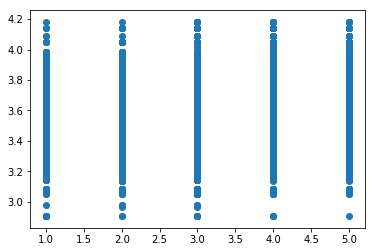

In [52]:
plt.scatter(y_test,y_pred)
plt.show()

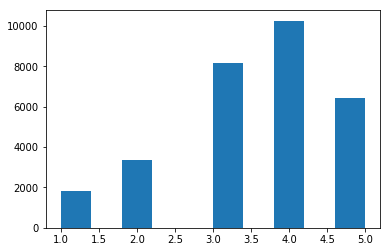

In [53]:
plt.hist(y_test)
plt.show()

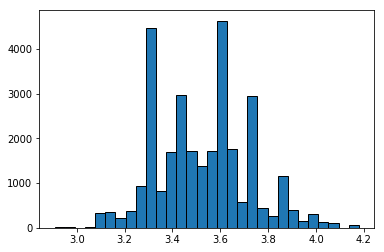

In [56]:
plt.hist(y_pred,bins=30,edgecolor='black')
plt.show()

In [32]:
from sklearn import linear_model

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
mode1=LogisticRegression()

In [35]:
mode1.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
y_pred=mode1.predict(x_test)

In [38]:
mean_absolute_error(y_test,y_pred)

0.8829039032032265

In [39]:
mean_squared_error(y_test,y_pred)

1.4424185860471317

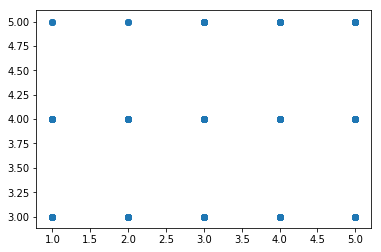

In [41]:
plt.scatter(y_test,y_pred)
plt.show()

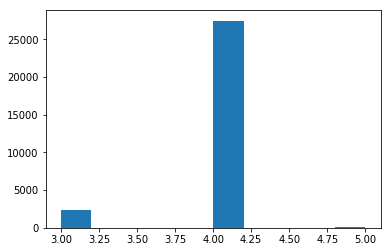

In [42]:
plt.hist(y_pred)
plt.show()

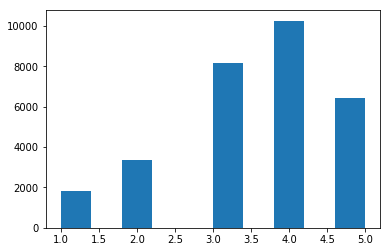

In [44]:
plt.hist(y_test)
plt.show()

In [67]:
from random import randint

In [129]:
l11=[]
for var in range(len(x_test)):
    l11.append([ randint(0,1) for var in range(18) ])

In [130]:
l22=pd.DataFrame(l11)

In [131]:
l22.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,0,0,1,0,1,1,0,0,1,1,1,1,0,0,1,0,1
1,1,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0
2,0,1,0,0,0,1,1,1,1,1,0,1,1,1,1,0,1,0
3,0,0,0,1,0,1,1,1,0,1,1,1,1,0,1,1,1,0
4,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0


In [132]:
l22.shape

(30001, 18)

In [133]:
y_predict=rat.predict(l22)

In [134]:
mean_absolute_error(y_test,y_predict)

1.0788511035706498

In [135]:
mean_squared_error(y_test,y_predict)

1.9274808482327872

In [143]:
y_predict[:10]

array([4.14778295, 3.77568573, 4.99037   , 4.64261371, 4.17639925,
       4.27040893, 3.39857285, 4.33824391, 4.35865153, 4.25366337])

In [138]:
y_test[:10]

1232     4
40986    5
3894     3
62669    3
27938    3
93980    3
79044    4
89234    5
41166    4
54678    3
Name: rating, dtype: int64

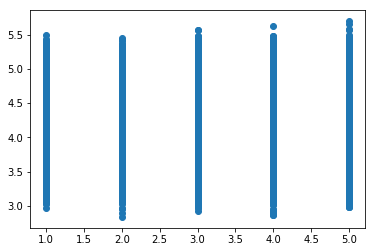

In [139]:
plt.scatter(y_test,y_predict)
plt.show()